# Model Selection and Regularization (Seleção de Modelos e Regularização)

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo
* Introdução
* Seleção de Subconjuntos
  * Melhor Seleção de Subconjunto
  * Forward Stepwise Selection (Seleção passo a passo para frente)
  * Backward Stepwise Selection (Seleção passo a passo para trás)
  * Escolhendo o modelo ideal
* Validação e Validação Cruzada
* Shrinkage Methods (Métodos de Encolhimento)
  * Ridge Regression
  * Trade-off de viés-variância
  * Lasso
  * Comparando a regressão Lasso e Ridge
  * Selecionando o parâmetro de ajuste
* Modelos de Redução de Dimensionalidade

6.1 Subset Selection . . . . . . . . . . . . . . . . . . . . . . . . 231
6.1.1 Best Subset Selection . . . . . . . . . . . . . . . . . 231
6.1.2 Stepwise Selection . . . . . . . . . . . . . . . . . . 233
6.1.3 Choosing the Optimal Model . . . . . . . . . . . . 235
6.2 Shrinkage Methods . . . . . . . . . . . . . . . . . . . . . . 240
6.2.1 Ridge Regression . . . . . . . . . . . . . . . . . . . 240
6.2.2 The Lasso . . . . . . . . . . . . . . . . . . . . . . . 244
6.2.3 Selecting the Tuning Parameter . . . . . . . . . . . 252
6.3 Dimension Reduction Methods . . . . . . . . . . . . . . . . 253
6.3.1 Principal Components Regression . . . . . . . . . . 254
6.3.2 Partial Least Squares . . . . . . . . . . . . . . . . . 260
6.4 Considerations in High Dimensions . . . . . . . . . . . . . 262
6.4.1 High-Dimensional Data . . . . . . . . . . . . . . . . 262
6.4.2 What Goes Wrong in High Dimensions? . . . . . . 263
6.4.3 Regression in High Dimensions . . . . . . . . . . . 265
6.4.4 Interpreting Results in High Dimensions . . . . . . 26



### Referências

* [An Introduction to Statistical Learning](https://www.statlearning.com/) (ISL) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani
  * Capítulo 6***
* [The Elements of Statistical Learning](https://hastie.su.domains/ElemStatLearn/) (ESL) by Trevor Hastie, Robert Tibshirani and Jerome Friedman : 


***Disclaimer:*** *O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer feedback ou sugestão de melhoria.*

### 1. Introdução

***Na era do big data***, não enfrentamos apenas o desafio de trabalhar com conjuntos de dados com um grande número de observações (ou amostras), normalmente representado pela letra $n$. Muitas vezes, também lidamos com um número muito elevado de variáveis explicativas ou preditores, que vamos denotar por $p$.

Por exemplo, imagine um estudo com $n = 100$ indivíduos, para os quais coletamos $p = 10$ variáveis, como idade, peso, altura, escolaridade, entre outras. Nesse caso, temos uma situação tradicional, onde o número de variáveis ($p$) é bem menor do que o número de observações ($n$). Esse cenário é confortável para a aplicação de OLS.

Entretanto, com a crescente disponibilidade de dados, é cada vez mais comum nos depararmos com situações onde o número de variáveis é muito grande, às vezes até maior do que o número de observações (por exemplo, $p = 10.000$ variáveis para apenas $n = 100$ indivíduos). Nesses casos, surgem sérios desafios:

- Quando $p > n$, o modelo OLS **não pode ser ajustado** da forma usual, pois o sistema de equações possui infinitas soluções.
- Mesmo quando $p < n$, incluir muitas variáveis pode levar a problemas como o **sobreajuste** (**overfitting**) e **multicolinearidade**, prejudicando a capacidade de generalização do modelo.

Além disso, muitas vezes nos interessa construir um modelo **parcimonioso**, que utilize apenas um subconjunto de variáveis relevantes, que chamaremos de $k$. Em geral, buscamos que esse número $k$ de variáveis efetivamente incluídas no modelo seja **muito menor** do que o total disponível: $k \ll p$, e claro, $k < n$. Esse processo de ***identificar e selecionar as variáveis mais importantes*** é conhecido como **seleção de variáveis**.

Diante desses desafios, surgem técnicas de **seleção de modelos** e **regularização**, cujo objetivo é:

- Permitir a modelagem mesmo quando $p$ é grande em relação a $n$;
- Evitar o sobreajuste;
- Melhorar a capacidade de previsão;
- Produzir modelos mais interpretáveis.

Nesta aula, abordaremos as principais abordagens para lidar com esses problemas, incluindo:

- **Seleção por subconjuntos**;
- **Métodos de regularização**, como Ridge e Lasso;
- **Redução de dimensionalidade**, como a regressão por componentes principais (PCR) e Partial Least Squares (PLS).

Nosso foco será entender não apenas como aplicar essas técnicas, mas também quando e por que elas são necessárias, especialmente em cenários de **alta dimensionalidade**.

Carregando as bibliotecas necessárias e definindo a plotagem.

In [1]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Import
import pandas as pd
import numpy as np
import time
import itertools
import statsmodels.api as sm
import seaborn as sns

from numpy.random import normal, uniform
from itertools import combinations
from statsmodels.api import add_constant
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import KFold, cross_val_score, train_test_split, LeaveOneOut, ShuffleSplit
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Set global parameters
%matplotlib inline
plt.style.use('seaborn-v0_8-white')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

### 2. Seleção de Subconjuntos

A abordagem de **seleção de subconjuntos** envolve a identificação de um subconjunto dentre os $p$ preditores disponíveis, que acreditamos estar relacionados à variável resposta. Em seguida, ajustamos um modelo utilizando mínimos quadrados apenas com esse conjunto reduzido de variáveis.

Vamos carregar o banco de dados e chamá-lo de `credit`.

In [4]:
# Credit ratings dataset
credit = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Credit.csv', usecols=list(range(1,12)))
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Vamos analisar a relação entre ***características individuais*** e `Balance` da conta no conjunto de dados `Credit`.

In [5]:
# X and y
X = credit.loc[:, credit.columns != 'Balance']
y = credit.loc[:,'Balance']

In [6]:
X

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian
2,104.593,7075,514,4,71,11,Male,No,No,Asian
3,148.924,9504,681,3,36,11,Female,No,No,Asian
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian
...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian
396,13.364,3838,296,5,65,17,Male,No,No,African American
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian


In [8]:
y

0      333
1      903
2      580
3      964
4      331
      ... 
395    560
396    480
397    138
398      0
399    966
Name: Balance, Length: 400, dtype: int64

### 2.1. Melhor Seleção de Subconjunto

A **melhor seleção de subconjunto** consiste em ajustar uma regressão de mínimos quadrados separada para **cada combinação possível** de preditores. Ou seja, ajustamos:

- todos os modelos que contêm exatamente um preditor;
- todos os modelos que contêm exatamente dois preditores;
- e assim por diante, até considerar o modelo com todos os preditores.

Em seguida, comparamos todos os modelos resultantes, com o objetivo de identificar aquele que apresenta o melhor desempenho segundo algum critério (como $R^2$, AIC, BIC ou RSS).

**Claramente, a principal desvantagem da melhor seleção de subconjunto é o seu elevado custo computacional**, especialmente quando o número de preditores $p$ é grande, pois o número de modelos possíveis cresce exponencialmente com $p$.

A seguir, apresentamos uma função que implementa essa abordagem em Python, permitindo avaliar diferentes combinações de variáveis de acordo com múltiplas métricas.


In [9]:
def model_selection(X, y, *args):
    """
    Função para seleção de modelo avaliando diferentes combinações de variáveis.

    Parâmetros:
    - X: DataFrame com variáveis explicativas.
    - y: Série ou array com variável dependente.
    - *args: funções que recebem um modelo ajustado e retornam um score (e.g., RSS, R²).

    Retorno:
    - Lista de arrays, cada um com colunas: [número de variáveis, valor da métrica]
    """
    
    # Inicializa listas para armazenar os scores
    scores = list(itertools.repeat(np.zeros((0, 2)), len(args)))

    # Variáveis categóricas a serem convertidas em dummies
    categ_cols = {"Gender", "Student", "Married", "Ethnicity"}

    # Número total de variáveis
    K = np.shape(X)[1]

    # Loop sobre o número de variáveis a serem incluídas (de 0 até K)
    for k in range(K + 1):
        print(f"Computing k={k}", end="")

        # Todas as combinações possíveis de k variáveis
        for i in combinations(range(K), k):

            # Subconjunto de variáveis
            X_subset = X.iloc[:, list(i)].copy()

            # Tratamento de variáveis categóricas
            if k > 0:
                categ_subset = list(categ_cols & set(X_subset.columns))
                X_subset = pd.get_dummies(X_subset, columns=categ_subset, drop_first=True)

            # Conversão para float para evitar erro no statsmodels
            if k > 0:
                X_subset = X_subset.astype(float)
            
            # Adiciona constante
            X_reg = add_constant(X_subset, has_constant='add') if k > 0 else np.ones((len(y), 1))

            # Ajusta modelo
            reg = OLS(y, X_reg).fit()

            # Calcula e armazena as métricas
            for j, metric in enumerate(args):
                score = np.reshape([k, metric(reg)], (1, -1))
                scores[j] = np.append(scores[j], score, axis=0)
        
        print("", end="\r")

    return scores

Vamos considerar, neste exemplo, 10 variáveis explicativas e duas métricas de avaliação para a seleção de modelos:

- **Soma dos Quadrados dos Resíduos** (RSS — *Residual Sum of Squares*), que mede o erro de ajuste.
- **Coeficiente de Determinação** ($R^2$), que mede a proporção da variabilidade da resposta explicada pelo modelo.

A seguir, definimos essas métricas como funções e utilizamos a função `model_selection` para calcular as pontuações de todos os modelos possíveis.

In [10]:
# Set metrics
rss = lambda reg : reg.ssr
r2 = lambda reg : reg.rsquared

# Compute scores
scores = model_selection(X, y, rss, r2)
ms_RSS = scores[0]
ms_R2 = scores[1]

In [11]:
# Save best scores
K = np.shape(X)[1]
ms_RSS_best = [np.min(ms_RSS[ms_RSS[:,0]==k,1]) for k in range(K+1)]
ms_R2_best = [np.max(ms_R2[ms_R2[:,0]==k,1]) for k in range(K+1)]

Vamos traçar as melhores pontuações.

In [12]:
# Figure 6.1
def make_figure_6_1():

    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.suptitle('Figure 6.1: Best Model Selection')

    # RSS
    ax1.scatter(x=ms_RSS[:,0], y=ms_RSS[:,1], facecolors='None', edgecolors='k', alpha=0.5);
    ax1.plot(range(K+1), ms_RSS_best, c='r');
    ax1.scatter(np.argmin(ms_RSS_best), np.min(ms_RSS_best), marker='x', s=300)
    ax1.set_ylabel('RSS');

    # R2
    ax2.scatter(x=ms_R2[:,0], y=ms_R2[:,1], facecolors='None', edgecolors='k', alpha=0.5);
    ax2.plot(range(K+1), ms_R2_best, c='r');
    ax2.scatter(np.argmax(ms_R2_best), np.max(ms_R2_best), marker='x', s=300)
    ax2.set_ylabel('R2');

    # All axes;
    for ax in fig.axes:
        ax.set_xlabel('Number of Predictors'); 
        ax.set_yticks([]);

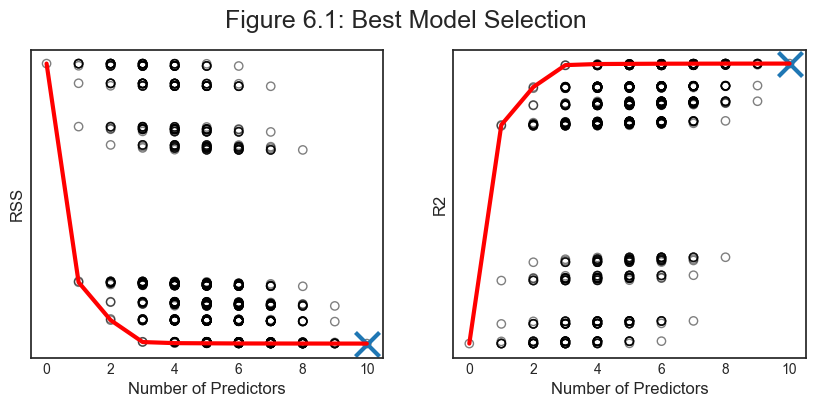

In [13]:
make_figure_6_1()

A figura mostra que, como esperado, ambas as métricas — o RSS e o $R^2$ — melhoram à medida que o número de variáveis aumenta. No entanto, a partir do modelo com **três variáveis**, observa-se que há **pouca melhoria adicional** no RSS e no $R^2$ com a inclusão de novos preditores.

Esse comportamento é típico: modelos mais complexos tendem a ajustar melhor os dados, mas com **ganhos marginais** à medida que mais variáveis são adicionadas, além de aumentarem o risco de **sobreajuste**. Assim, a seleção do modelo ideal deve balancear a qualidade do ajuste com a simplicidade e a interpretabilidade.


### 2.2. Forward Stepwise Selection (Seleção passo a passo para frente)

Por razões computacionais, a **melhor seleção de subconjunto** não pode ser aplicada quando o número de preditores $p$ é grande, pois o número de modelos possíveis cresce exponencialmente.

Enquanto a melhor seleção de subconjunto considera **todos os modelos possíveis** contendo subconjuntos dos $p$ preditores, a **seleção progressiva passo a passo** (**forward stepwise selection**) avalia um conjunto **muito menor** de modelos, tornando-se uma alternativa mais viável computacionalmente.

Esse procedimento começa com um modelo **sem nenhum preditor** e, em seguida, **adiciona preditores ao modelo, um de cada vez**, até que todos estejam presentes. A cada passo, a variável que proporciona a **maior melhoria adicional** no ajuste — segundo algum critério escolhido — é adicionada ao modelo.

Assim, a forward stepwise selection é uma estratégia **gulosa** (*greedy*), que busca construir um modelo eficiente sem precisar avaliar todas as combinações possíveis de preditores.

A seguir, implementamos o procedimento de **seleção progressiva passo a passo** (**forward selection**), que adiciona uma variável de cada vez, sempre escolhendo aquela que minimiza a função de avaliação especificada (por exemplo, a Soma dos Resíduos dos Quadrados - RSS).

In [14]:
def forward_selection(X, y, f):
    """
    Forward selection: adiciona uma variável de cada vez, escolhendo a que minimiza a função f.

    Parâmetros:
    - X: DataFrame com variáveis explicativas.
    - y: Série ou array com variável dependente.
    - f: função de avaliação do modelo (e.g., RSS).

    Retorno:
    - fms_scores: vetor com os melhores scores em cada passo.
    """
    
    # Inicializa RSS
    K = np.shape(X)[1]
    fms_scores = np.zeros((K,1))

    # Variáveis categóricas
    categ_cols = {"Gender", "Student", "Married", "Ethnicity"}

    # Lista de variáveis selecionadas
    selected_cols = []

    for k in range(1, K + 1):
        remaining_cols = [col for col in X.columns if col not in selected_cols]
        temp_scores = np.zeros((0,1))

        for col in remaining_cols:
            # Subset das variáveis
            X_subset = X.loc[:, selected_cols + [col]].copy()

            # Dummy encoding para categóricas
            categ_subset = list(categ_cols & set(X_subset.columns))
            if categ_subset:
                X_subset = pd.get_dummies(X_subset, columns=categ_subset, drop_first=True)

            # Conversão para float
            X_subset = X_subset.astype(float)

            # Adiciona constante
            X_reg = add_constant(X_subset, has_constant='add')

            # Regressão
            reg = OLS(y, X_reg).fit()

            # Avaliação
            temp_scores = np.append(temp_scores, f(reg))

        # Seleciona a melhor variável
        best_col = remaining_cols[np.argmin(temp_scores)]
        print(f"Selecionada: {best_col}")
        selected_cols += [best_col]
        fms_scores[k - 1] = np.min(temp_scores)

    return fms_scores

Agora, vamos selecionar o melhor modelo utilizando a Soma dos Resíduos dos Quadrados (RSS) como métrica:

In [15]:
# Forward selection by RSS
rss = lambda reg : reg.ssr
fms_RSS = forward_selection(X, y, rss)

Selecionada: Rating
Selecionada: Income
Selecionada: Student
Selecionada: Limit
Selecionada: Cards
Selecionada: Age
Selecionada: Ethnicity
Selecionada: Gender
Selecionada: Married
Selecionada: Education


Quais são, nesse caso, as variáveis mais importantes?

Em seguida, realizamos o mesmo procedimento, mas utilizando o coeficiente de determinação ($R^2$) como métrica de avaliação. Como o forward_selection busca minimizar a função, passamos $-R^2$ para manter a coerência com a lógica do algoritmo:

In [16]:
# Forward selection by R2
r2 = lambda reg : -reg.rsquared
fms_R2 = -forward_selection(X, y, r2)

Selecionada: Rating
Selecionada: Income
Selecionada: Student
Selecionada: Limit
Selecionada: Cards
Selecionada: Age
Selecionada: Ethnicity
Selecionada: Gender
Selecionada: Married
Selecionada: Education


Sem surpresa, ambos os métodos selecionam os mesmos modelos. Por quê? Porque, no final, o $R^2$ é apenas uma versão normalizada do RSS: eles estão monotonamente relacionados, e minimizar o RSS ou maximizar o $R^2$ tende a produzir a mesma sequência de variáveis selecionadas.

Por fim, vamos traçar as pontuações obtidas pelos dois métodos, para diferentes números de preditores, comparando visualmente os resultados.

In [17]:
# New figure 1
def make_new_figure_1():

    # Init
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.suptitle('Forward Model Selection')

    # RSS
    ax1.plot(range(1,K+1), fms_RSS, c='r');
    ax1.scatter(np.argmin(fms_RSS)+1, np.min(fms_RSS), marker='x', s=300)
    ax1.set_ylabel('RSS');

    # R2
    ax2.plot(range(1,K+1), fms_R2, c='r');
    ax2.scatter(np.argmax(fms_R2)+1, np.max(fms_R2), marker='x', s=300)
    ax2.set_ylabel('R2');

    # All axes;
    for ax in fig.axes:
        ax.set_xlabel('Number of Predictors'); 
        ax.set_yticks([]);

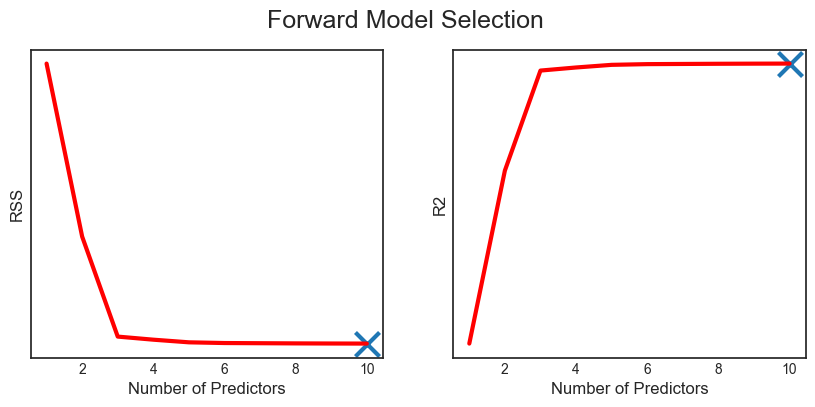

In [18]:
make_new_figure_1()

### 2.3. Backward Stepwise Selection (Seleção passo a passo para trás)

Assim como a **seleção passo a passo para frente**, a **seleção passo a passo para trás** oferece uma alternativa eficiente à **seleção do melhor subconjunto**. 

No entanto, ao contrário da forward selection, a **backward selection** começa com o **modelo completo**, contendo **todos os $p$ preditores**, e, a partir daí, **remove iterativamente** a variável **menos útil**, uma de cada vez, até que reste apenas uma variável no modelo.

A seguir, implementamos o procedimento:

In [19]:
def backward_selection(X, y, f):
    """
    Backward selection: remove uma variável de cada vez, excluindo a que minimiza a função f.

    Parâmetros:
    - X: DataFrame com variáveis explicativas.
    - y: Série ou array com variável dependente.
    - f: função de avaliação do modelo (e.g., RSS).

    Retorno:
    - fms_scores: vetor com os melhores scores em cada passo.
    """
    
    # Inicializa RSS
    K = np.shape(X)[1]
    fms_scores = np.zeros((K,1))

    # Variáveis categóricas
    categ_cols = {"Gender", "Student", "Married", "Ethnicity"}

    # Lista inicial com todas as variáveis
    selected_cols = list(X.columns)

    for k in range(K, 0, -1):
        temp_scores = np.zeros((0,1))

        for col in selected_cols:
            # Subset removendo uma variável
            X_subset = X.loc[:, [x for x in selected_cols if x != col]].copy()

            # Dummy encoding para categóricas
            categ_subset = list(categ_cols & set(X_subset.columns))
            if categ_subset:
                X_subset = pd.get_dummies(X_subset, columns=categ_subset, drop_first=True)

            # Conversão para float
            X_subset = X_subset.astype(float)

            # Adiciona constante
            X_reg = add_constant(X_subset, has_constant='add')

            # Regressão
            reg = OLS(y, X_reg).fit()

            # Avaliação
            temp_scores = np.append(temp_scores, f(reg))

        # Identifica a pior variável (que ao ser removida melhora a métrica)
        worst_col = selected_cols[np.argmin(temp_scores)]
        print(f"Removida: {worst_col}")

        # Remove a variável
        selected_cols.remove(worst_col)

        # Armazena o melhor score
        fms_scores[k - 1] = np.min(temp_scores)

    return fms_scores

Agora, realizamos a seleção de variáveis utilizando a Soma dos Resíduos dos Quadrados (RSS) como critério:

In [20]:
# Backward selection by RSS
rss = lambda reg : reg.ssr
bms_RSS = backward_selection(X, y, rss)

Removida: Education
Removida: Married
Removida: Gender
Removida: Ethnicity
Removida: Age
Removida: Rating
Removida: Cards
Removida: Student
Removida: Income
Removida: Limit


Quais são as variáveis mais importantes?

Em seguida, repetimos o procedimento usando o coeficiente de determinação ($R^2$)

In [27]:
# Backward selection by R2
r2 = lambda reg : -reg.rsquared
bms_R2 = -backward_selection(X, y, r2)

Removida: Education
Removida: Married
Removida: Gender
Removida: Ethnicity
Removida: Age
Removida: Rating
Removida: Cards
Removida: Student
Removida: Income
Removida: Limit


Uma parte interessante dessa análise é que a variável `Rating`, que foi selecionada primeiro na seleção passo a passo para frente, agora é descartada como a quinta variável antes da última na backward selection.

Por quê?

Provavelmente porque `Rating` contém muita informação por si só (por isso foi escolhida logo no início na forward selection), mas está altamente correlacionada com outras variáveis, como `Student`, `Income` e `Limit`. Como essas variáveis são mais ortogonais entre si, Rating acaba sendo removida antes delas na backward selection.

Para verificar isso, podemos observar as correlações entre essas variáveis:

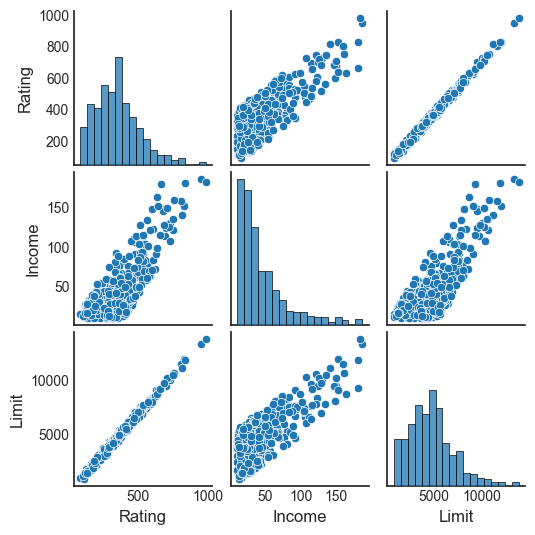

In [28]:
# Plot correlations
sns.pairplot(credit[['Rating','Student','Income','Limit']], height=1.8);


De fato, observamos que `Rating` e `Limit` são altamente correlacionados.

Por fim, vamos traçar as pontuações da backward selection, para diferentes números de preditores, assim como fizemos anteriormente com a forward selection.

In [29]:
# New figure 2
def make_new_figure_2():

    # Init
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.suptitle('Backward Model Selection')

    # RSS
    ax1.plot(range(1,K+1), bms_RSS, c='r');
    ax1.scatter(np.argmin(bms_RSS)+1, np.min(bms_RSS), marker='x', s=300)
    ax1.set_ylabel('RSS');

    # R2
    ax2.plot(range(1,K+1), bms_R2, c='r');
    ax2.scatter(np.argmax(bms_R2)+1, np.max(bms_R2), marker='x', s=300)
    ax2.set_ylabel('R2');

    # All axes;
    for ax in fig.axes:
        ax.set_xlabel('Number of Predictors'); 
        ax.set_yticks([]);

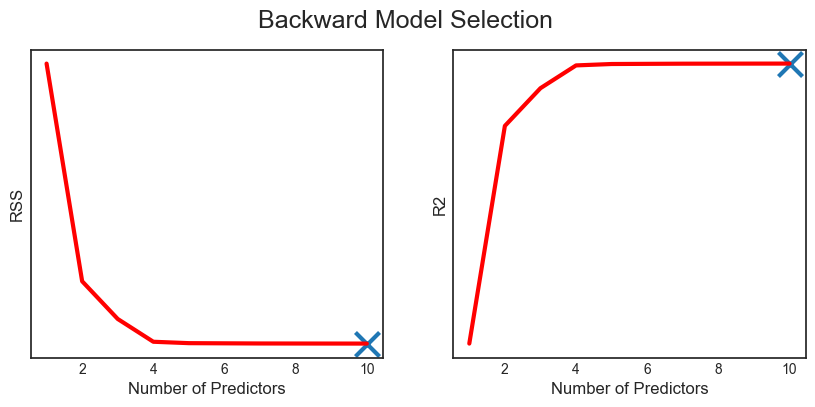

In [30]:
make_new_figure_2()

### 2.4. Escolhendo o modelo ideal

Até agora, utilizamos o **erro de treinamento** para selecionar o modelo. No entanto, o erro de treinamento pode ser uma **estimativa ruim** do erro de teste. Como resultado, métricas como o **RSS** e o **$R^2$** **não são adequadas** para selecionar o melhor modelo entre um conjunto de modelos com diferentes números de preditores.

Para selecionar o **melhor modelo** em relação ao **erro de teste**, precisamos **estimar** esse erro. Existem duas abordagens comuns para isso:

- Podemos **estimar indiretamente** o erro de teste, ajustando o erro de treinamento para levar em conta o **viés introduzido pelo sobreajuste** (*overfitting*).
- Podemos **estimar diretamente** o erro de teste utilizando um **conjunto de validação** ou uma abordagem de **validação cruzada**.

Algumas métricas amplamente utilizadas que ajustam o erro de treinamento, penalizando a complexidade do modelo, são:

- **Critério de Informação de Akaike (AIC)**
- **Critério de Informação Bayesiano (BIC)**
- **$R^2$ Ajustado ($R^2_{adj}$)**

A ideia por trás de todas essas métricas é incluir uma **penalização** pelo número de parâmetros utilizados no modelo, favorecendo modelos mais **parcimoniosos**. Todas essas medidas possuem fundamentos teóricos importantes, que, no entanto, **estão além do escopo** desta sessão.

Agora, vamos testar essas três métricas:

In [31]:
# Set metrics
aic = lambda reg : reg.aic
bic = lambda reg : reg.bic
r2a = lambda reg : reg.rsquared_adj

# Compute best model selection scores
scores = model_selection(X, y, aic, bic, r2a)
ms_AIC = scores[0]
ms_BIC = scores[1]
ms_R2a = scores[2]

Em seguida, extraímos os melhores valores para cada número possível de preditores:

In [32]:
# Save best scores
ms_AIC_best = [np.min(ms_AIC[ms_AIC[:,0]==k,1]) for k in range(K+1)]
ms_BIC_best = [np.min(ms_BIC[ms_BIC[:,0]==k,1]) for k in range(K+1)]
ms_R2a_best = [np.max(ms_R2a[ms_R2a[:,0]==k,1]) for k in range(K+1)]

Agora, traçamos as pontuações para os diferentes métodos de seleção de modelos, produzindo uma figura similar à Figura 6.2.

In [33]:
# Figure 6.2
def make_figure_6_2():

    # Init
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,5))
    fig.suptitle('Figure 6.2')

    # AIC
    ax1.scatter(x=ms_AIC[:,0], y=ms_AIC[:,1], facecolors='None', edgecolors='k', alpha=0.5);
    ax1.plot(range(K+1),ms_AIC_best, c='r');
    ax1.scatter(np.argmin(ms_AIC_best), np.min(ms_AIC_best), marker='x', s=300)
    ax1.set_ylabel('AIC');

    # BIC
    ax2.scatter(x=ms_BIC[:,0], y=ms_BIC[:,1], facecolors='None', edgecolors='k', alpha=0.5);
    ax2.plot(range(K+1), ms_BIC_best, c='r');
    ax2.scatter(np.argmin(ms_BIC_best), np.min(ms_BIC_best), marker='x', s=300)
    ax2.set_ylabel('BIC');

    # R2 adj
    ax3.scatter(x=ms_R2a[:,0], y=ms_R2a[:,1], facecolors='None', edgecolors='k', alpha=0.5);
    ax3.plot(range(K+1), ms_R2a_best, c='r');
    ax3.scatter(np.argmax(ms_R2a_best), np.max(ms_R2a_best), marker='x', s=300)
    ax3.set_ylabel('R2_adj');

    # All axes;
    for ax in fig.axes:
        ax.set_xlabel('Number of Predictors'); 
        ax.set_yticks([]);

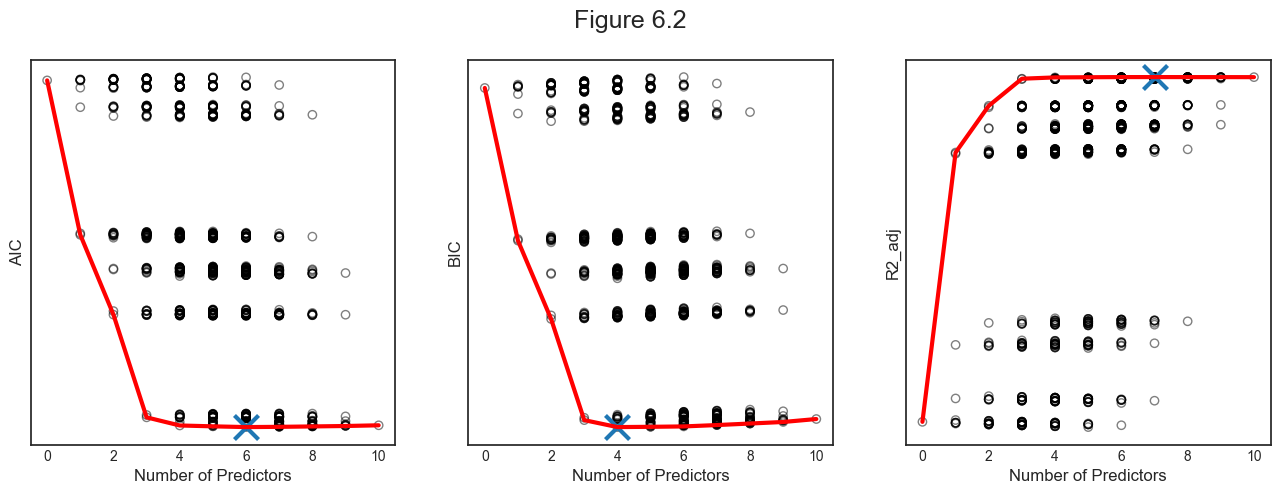

In [34]:
make_figure_6_2()

Como podemos observar, todas as três métricas tendem a selecionar modelos mais parcimoniosos, penalizando a inclusão excessiva de variáveis.

* O BIC se mostra particularmente conservador, selecionando um modelo com apenas 4 variáveis.

* O $R^2_{adj}$, por outro lado, seleciona um modelo maior, com 7 variáveis.

Esse comportamento está alinhado com a natureza dessas métricas: o BIC tende a penalizar mais fortemente modelos complexos do que o AIC ou o $R^2_{adj}$, favorecendo soluções mais simples.

### 3. Validação e Validação Cruzada

Como alternativa às abordagens discutidas anteriormente, podemos **estimar diretamente o erro de teste** utilizando o **conjunto de validação** ou os métodos de **validação cruzada** vistos anteriormente.

A principal vantagem dessas abordagens é que elas proporcionam uma **estimativa mais realista do erro de generalização**, ao avaliar o desempenho do modelo em dados **não utilizados** durante o treinamento.

Por outro lado, o principal **problema da validação cruzada** é a **carga computacional**: à medida que o número de partições aumenta, cresce também o número de modelos que precisam ser ajustados.

Nesta seção, realizaremos a **seleção do melhor modelo** utilizando os seguintes esquemas de validação cruzada:

- **Abordagem de conjunto de validação** com **divisão 50-50**, repetida **10 vezes**.
- **Validação cruzada** com **5 partições** (*5-fold cross-validation*).
- **Validação cruzada** com **10 partições** (*10-fold cross-validation*).

**Observação:** não realizaremos a **validação cruzada Leave-One-Out (LOOCV)** devido ao seu **alto custo computacional**, especialmente em cenários com muitos modelos potenciais.


In [36]:
def cv_scores(X, y, *args):

    # Init 
    scores = list(itertools.repeat(np.zeros((0,2)), len(args)))

    # Categorical variables 
    categ_cols = {"Gender", "Student", "Married", "Ethnicity"}

    # Loop over all possible combinations of regressions
    K = np.shape(X)[1]
    for k in range(K+1):
        print("Computing k=%1.0f" % k, end ="")
        for i in combinations(range(K), k):

            # Subset X
            X_subset = X.iloc[:,list(i)]

            # Get dummies for categorical variables
            if k>0:
                categ_subset = list(categ_cols & set(X_subset.columns))
                X_subset = pd.get_dummies(X_subset, columns=categ_subset, drop_first=True)

            # Metrics
            for i,cv_method in enumerate(args):
                score = cross_val_score(LinearRegression(), add_constant(X_subset), y, 
                                        cv=cv_method, scoring='neg_mean_squared_error').mean()
                score_pair = np.reshape([k,score], (1,-1))
                scores[i] = np.append(scores[i], score_pair, axis=0)
        print("", end="\r")
                
    return scores

Agora, definimos os métodos de validação cruzada e calculamos as pontuações:

In [38]:
# Define cv methods
vset = ShuffleSplit(n_splits=10, test_size=0.5)
kf5 = KFold(n_splits=5, shuffle=True)
kf10 = KFold(n_splits=10, shuffle=True)

# Get best model selection scores
scores = cv_scores(X, y, vset, kf5, kf10)
ms_vset = scores[0]
ms_kf5 = scores[1]
ms_kf10 = scores[2]

Em seguida, extraímos as melhores pontuações para cada número de preditores:

In [39]:
# Save best scores
ms_vset_best = [np.max(ms_vset[ms_vset[:,0]==k,1]) for k in range(K+1)]
ms_kf5_best = [np.max(ms_kf5[ms_kf5[:,0]==k,1]) for k in range(K+1)]
ms_kf10_best = [np.max(ms_kf10[ms_kf10[:,0]==k,1]) for k in range(K+1)]

Por fim, traçamos as pontuações obtidas para cada método de validação cruzada, gerando a Figura 6.3:

In [40]:
# Figure 6.3
def make_figure_6_3():

    # Init
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,5))
    fig.suptitle('Figure 6.3')

    # Validation Set
    ax1.scatter(x=ms_vset[:,0], y=ms_vset[:,1], facecolors='None', edgecolors='k', alpha=0.5);
    ax1.plot(range(K+1),ms_vset_best, c='r');
    ax1.scatter(np.argmax(ms_vset_best), np.max(ms_vset_best), marker='x', s=300)
    ax1.set_ylabel('Validation Set');


    # 5-Fold Cross Validation
    ax2.scatter(x=ms_kf5[:,0], y=ms_kf5[:,1], facecolors='None', edgecolors='k', alpha=0.5);
    ax2.plot(range(K+1), ms_kf5_best, c='r');
    ax2.scatter(np.argmax(ms_kf5_best), np.max(ms_kf5_best), marker='x', s=300)
    ax2.set_ylabel('5-Fold Cross Validation');


    # 10-Fold Cross-Validation
    ax3.scatter(x=ms_kf10[:,0], y=ms_kf10[:,1], facecolors='None', edgecolors='k', alpha=0.5);
    ax3.plot(range(K+1), ms_kf10_best, c='r');
    ax3.scatter(np.argmax(ms_kf10_best), np.max(ms_kf10_best), marker='x', s=300)
    ax3.set_ylabel('10-Fold Cross-Validation');

    # All axes;
    for ax in fig.axes:
        ax.set_xlabel('Number of Predictors'); 
        ax.set_yticks([]);

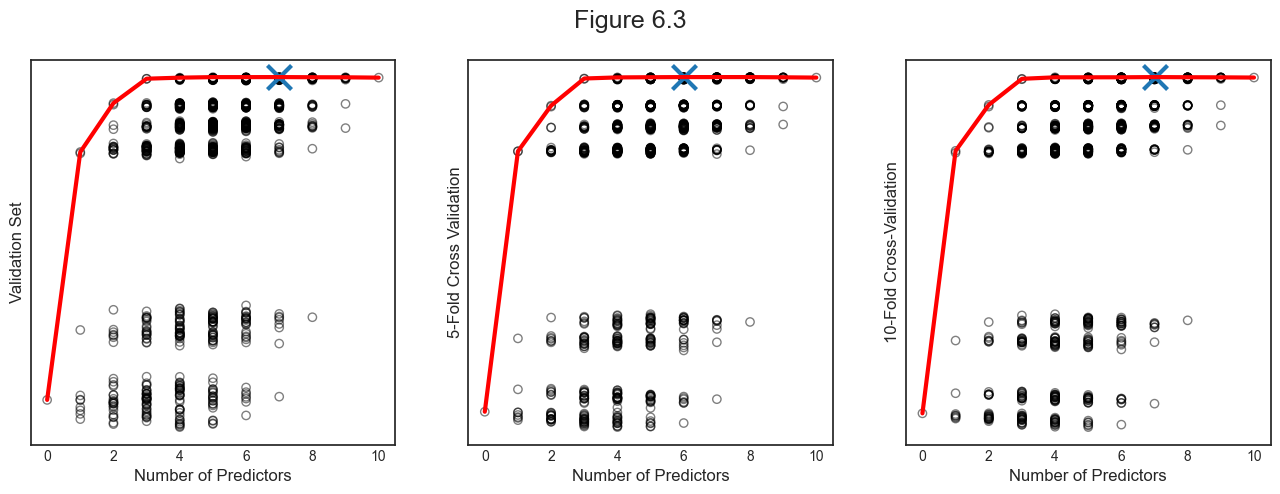

In [41]:
make_figure_6_3()

Na figura, observamos que **cada método de validação cruzada seleciona um modelo diferente**. O mais preciso, a **validação cruzada K-fold**, seleciona um modelo com **6 preditores** (no caso do **5-fold**) e **7 preditores** (no caso do **10-fold**).

Esse resultado ilustra como **diferentes esquemas de validação** podem levar a **escolhas distintas de modelos**, dependendo do **trade-off entre viés e variância** associado a cada método.


### 5. Shrinkage Methods (Métodos de Encolhimento)

Os métodos de seleção de modelos restringiam o número de variáveis ​​antes de executar uma regressão linear. Os métodos de encolhimento tentam fazer as duas coisas simultaneamente. Em particular, eles restringem ou reduzem os coeficientes impondo penalidades nas funções objetivo para valores altos dos parâmetros.

### 5.1. Ridge Regression (Regressão de Ridge)

A regressão dos mínimos quadrados minimiza a soma residual dos quadrados

$$ RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2  = \sum_{i=1}^{n} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_{i1} - \hat{\beta}_2 x_{i2} - ... - \hat{\beta}_p x_{ip})^2 $$


A função objetivo da regressão de Ridge é

$$ RSS + \lambda \sum_{j=1}^{p} \hat{\beta}_j^2 $$


onde $\lambda>0$ é um parâmetro de ajuste que regula até que ponto parâmetros grandes são penalizados.

Na notação matricial, a função objetivo é

$$ ||X\beta - y||^2_2 + \alpha ||\beta||^2_2 $$


o que é equivalente a otimizar

$$ \frac{1}{N} ||X\beta - y||^2_2 + \frac{\alpha}{N} ||\beta||^2_2 $$
 

Agora, executaremos a Regressão de Ridge no Creditconjunto de dados, tentando explicar a conta Balancecom um conjunto de características individuais observáveis.

In [31]:
# X and y
categ_cols = ["Gender", "Student", "Married", "Ethnicity"]
X = credit.loc[:, credit.columns != 'Balance']
X = pd.get_dummies(X, columns=categ_cols, drop_first=True)
y = credit.loc[:,'Balance']
n = len(credit)

Executamos a regressão de crista em uma faixa de valores para o parâmetro de penalidade $\lambda$.

In [32]:
# Init alpha grid
n_grid = 100
alphas = 10**np.linspace(-2,5,n_grid).reshape(-1,1)
ridge = Ridge()
ridge_coefs = []

# Loop over values of alpha
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X), y)
    ridge_coefs.append(ridge.coef_)
ridge_coefs = np.reshape(ridge_coefs,(n_grid,-1))

Usamos regressão linear como comparação.

In [33]:
# OLS regression
ols = LinearRegression().fit(scale(X),y)
ols_coefs = ols.coef_;
mod_ols = np.linalg.norm(ols_coefs)

# Relative magnitude
rel_beta = [np.linalg.norm(ridge_coefs[k,:])/mod_ols for k in range(n_grid)]
rel_beta = np.reshape(rel_beta, (-1,1))

Nós plotamos os resultados

In [34]:
# Figure 6.4
def make_figure_6_4():

    # Init
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.suptitle('Figure 6.4: Ridge Regression Coefficients')

    highlight = [0,1,2,7];

    # Plot coefficients - absolute
    ax1.plot(alphas, ridge_coefs[:,highlight], alpha=1)
    ax1.plot(alphas, ridge_coefs, c='grey', alpha=0.3)
    ax1.set_xscale('log')
    ax1.set_xlabel('lambda'); ax1.set_ylabel('Standardized coefficients');
    ax1.legend(['Income', 'Limit', 'Rating', 'Student'])

    # Plot coefficients - relative
    ax2.plot(rel_beta, ridge_coefs[:,highlight], alpha=1)
    ax2.plot(rel_beta, ridge_coefs, c='grey', alpha=0.3)
    ax2.set_xlabel('Relative Beta'); ax2.set_ylabel('Standardized coefficients');

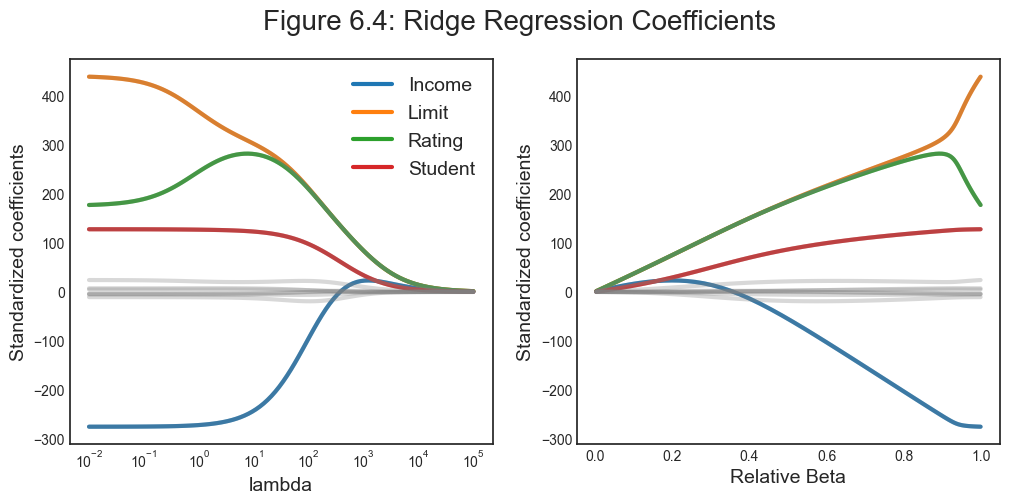

In [35]:
make_figure_6_4()

À medida que diminuímos $\lambda$, os coeficientes de Ridge aumentam. Além disso, as variáveis ​​com os coeficientes consistentemente maiores são Income, Limit, Ratinge Student.

### 5.2. Trade-off de viés-variância

A vantagem da regressão de crista sobre os mínimos quadrados está enraizada na compensação entre viés e variância.
$\lambda$ aumenta, a flexibilidade do ajuste de regressão de crista diminui, levando à diminuição da variância, mas ao aumento do viés.

$$ y_0 = f(x_0) + \epsilon $$

Recapitulação: podemos decompor o erro quadrático médio de um estimador em dois componentes: a variância e o viés quadrático :

$$ E[y_0 - \hat{f}(x_0)]^2 = E[(f(x_0) + \epsilon - \hat{f}(x_0))^2] = E[(f(x_0) - \hat{f}(x_0))^2] + E[\epsilon^2] + 2E[(f(x_0) - \hat{f}(x_0))\epsilon] $$

O último termo é a variância do termo de erro, às vezes também chamado de erro irredutível , pois é ruído puro e não podemos explicá-lo.

In [36]:
# Compute var-bias
def compute_var_bias(X_train, b0, x0, a, k, n, sim, f):
    
    # Init 
    y_hat = np.zeros(sim)
    coefs = np.zeros((sim, k))
    
    # Loop over simulations
    for s in range(sim):
        e_train = normal(0,1,(n,1))
        y_train = X_train @ b0 + e_train
        fit = f(a).fit(X_train, y_train)
        y_hat[s] = fit.predict(x0)
        coefs[s,:] = fit.coef_
        
    # Compute MSE, Var and Bias2   
    e_test = normal(0,1,(sim,1))
    y_test = x0 @ b0 + e_test
    mse = np.mean((y_test - y_hat)**2)
    var = np.var(y_hat)
    bias2 = np.mean(x0 @ b0 - y_hat)**2
    
    return [mse, var, bias2], np.mean(coefs, axis=0)

In [37]:
np.random.seed(1)

# Generate random data
n = 50
k = 45
N = 50000
X_train = normal(0.2,1,(n,k))
x0 = normal(0.2,1,(1,k))
e_train = normal(0,1,(n,1))
b0 = uniform(0,1,(k,1))

In [38]:
# Init alpha grid
sim = 1000
n_grid = 30
df = pd.DataFrame({'alpha':10**np.linspace(-5,5,n_grid)})
ridge_coefs2 = []

# Init simulations
sim = 1000
ridge = lambda a: Ridge(alpha=a, fit_intercept=False)

# Loop over values of alpha
for i in range(len(df)):
    print("Alpha %1.0f/%1.0f" % (i+1,len(df)), end ="")
    a = df.loc[i,'alpha']
    df.loc[i,['mse','var','bias2']], c = compute_var_bias(X_train, b0, x0, a, k, n, sim, ridge)
    ridge_coefs2.append(c)
    print("", end="\r")
ridge_coefs2 = np.reshape(ridge_coefs2,(n_grid,-1))

In [39]:
# OLS regression
y_train = X_train @ b0 + e_train
ols = LinearRegression().fit(X_train,y_train)
ols_coefs = ols.coef_;
mod_ols = np.linalg.norm(ols_coefs)

# Relative magnitude
rel_beta = [np.linalg.norm(ridge_coefs2[i,:])/mod_ols for i in range(n_grid)]
rel_beta = np.reshape(rel_beta, (-1,1))

In [40]:
# Figure 6.5
def make_figure_6_5():
    
    # Init
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.suptitle('Figure 6.5: Ridge Bias-Var decomposition')

    # MSE
    ax1.plot(df['alpha'], df[['bias2','var','mse']]);
    ax1.set_xscale('log');
    ax1.set_xlabel('lambda'); ax1.set_ylabel('Mean Squared Error');
    ax1.legend(['Bias2','Variance','MSE'], fontsize=12);

    # MSE
    ax2.plot(rel_beta, df[['bias2','var','mse']]);
    ax2.set_xlabel('Relative Beta'); ax2.set_ylabel('Mean Squared Error');
    ax2.legend(['Bias2','Variance','MSE'], fontsize=12);

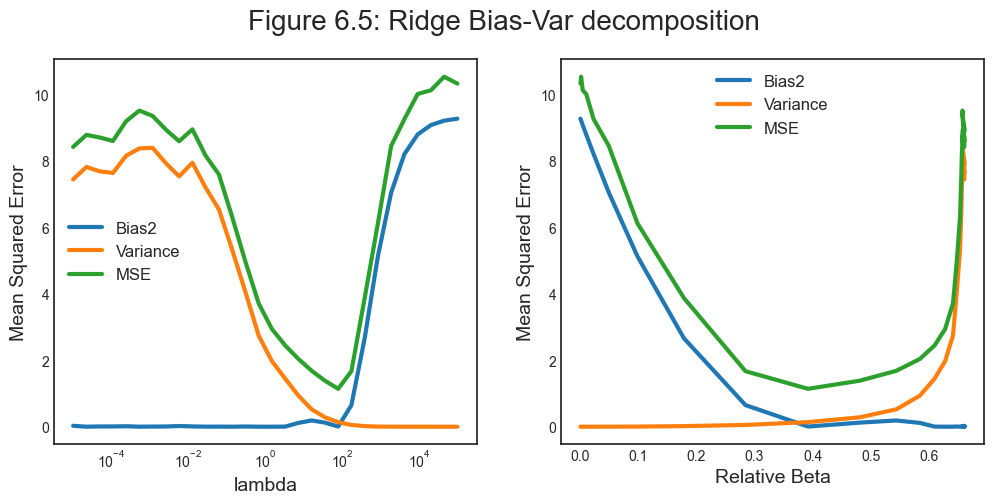

In [41]:
make_figure_6_5()

A regressão de crista tem a vantagem de reduzir os coeficientes. No entanto, ao contrário da seleção do melhor subconjunto, da seleção passo a passo para frente e da seleção passo a passo para trás, que geralmente selecionam modelos que envolvem apenas um subconjunto das variáveis, a regressão de crista incluirá todas as variáveis. $p$
preditores no modelo final.

O Lasso resolve esse problema usando uma função de penalidade diferente.

### 5.4. Lasso (Laço)

Os coeficientes do LASSO minimizam a seguinte função objetivo:

$$ 


de modo que a principal diferença em relação à regressão de crista é a função de penalidade
em vez de
.

Uma consequência dessa função objetivo é que Lasso tem muito mais probabilidade de reduzir os coeficientes a exatamente zero, enquanto Ridge apenas diminui sua magnitude. A razão para isso reside na forma da função objetivo. Você pode reescrever os problemas de minimização de Ridge e Lasso como otimização restrita:

Cume
\underset{\beta}{\operatorname{min}} \ \esquerda{\sum_{i=1}^{n}\esquerda(y_{i}-\beta_{0}-\sum_{j=1}^{p} \beta_{j} x_{ij}\direita)^{2}\direita} \quad \texto { sujeito a } \quad \sum_{j=1}^{p}\esquerda|\beta_{j}\direita| \leq s

Laço
\underset{\beta}{\operatorname{min}} \ \esquerda{\sum_{i=1}^{n}\esquerda(y_{i}-\beta_{0}-\sum_{j=1}^{p} \beta_{j} x_{ij}\direita)^{2}\direita} \quad \texto { sujeito a } \quad \sum_{j=1}^{p} \beta_{j}^{2} \leq s

Nas imagens, o problema de otimização restrita se parece com isso.

Desenho
As curvas vermelhas representam os conjuntos de contornos do RSS. Elas são elípticas, visto que a função objetivo é quadrática. A área azul representa o conjunto admissível, ou seja, as restrições. Como podemos ver, é muito mais fácil com Lasso ter o ótimo restrito em uma das arestas do losango.

Vamos agora repetir o mesmo exercício no Creditconjunto de dados, tentando prever a conta Balancecom um conjunto de características individuais observáveis, para diferentes valores do parâmetro de penalidade

In [42]:
# X and y
categ_cols = ["Gender", "Student", "Married", "Ethnicity"]
X = credit.loc[:, credit.columns != 'Balance']
X = pd.get_dummies(X, columns=categ_cols, drop_first=True)
y = credit.loc[:,'Balance']

O $\lambda$ a grade será um pouco diferente agora.

In [44]:
# Init alpha grid
n_grid = 100
alphas = 10 ** np.linspace(0, 3, n_grid)  # Sem reshape

lasso = Lasso(max_iter=10000)  # Garantia de convergência
lasso_coefs = []

# Loop over values of alpha
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    lasso_coefs.append(lasso.coef_)

lasso_coefs = np.reshape(lasso_coefs, (n_grid, -1))

Executamos o OLS para traçar a magnitude relativa dos coeficientes do Lasso.

In [45]:
# Relative magnitude
mod_ols = np.linalg.norm(ols_coefs)
rel_beta = [np.linalg.norm(lasso_coefs[i,:])/mod_ols for i in range(n_grid)]
rel_beta = np.reshape(rel_beta, (-1,1))

Traçamos a magnitude dos coeficientes $\beta$ 
* para diferentes valores de $\lambda$.
* para diferentes valores de $||\beta||$.

In [46]:
# Figure 6.6
def make_figure_6_6():

    # Init
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.suptitle('Figure 6.6')

    highlight = [0,1,2,7];

    # Plot coefficients - absolute
    ax1.plot(alphas, lasso_coefs[:,highlight], alpha=1)
    ax1.plot(alphas, lasso_coefs, c='grey', alpha=0.3)
    ax1.set_xscale('log')
    ax1.set_xlabel('lambda'); ax1.set_ylabel('Standardized coefficients');
    ax1.legend(['Income', 'Limit', 'Rating', 'Student'], fontsize=12)

    # Plot coefficients - relative
    ax2.plot(rel_beta, lasso_coefs[:,highlight], alpha=1)
    ax2.plot(rel_beta, lasso_coefs, c='grey', alpha=0.3)
    ax2.set_xlabel('relative mod beta'); ax2.set_ylabel('Standardized coefficients');

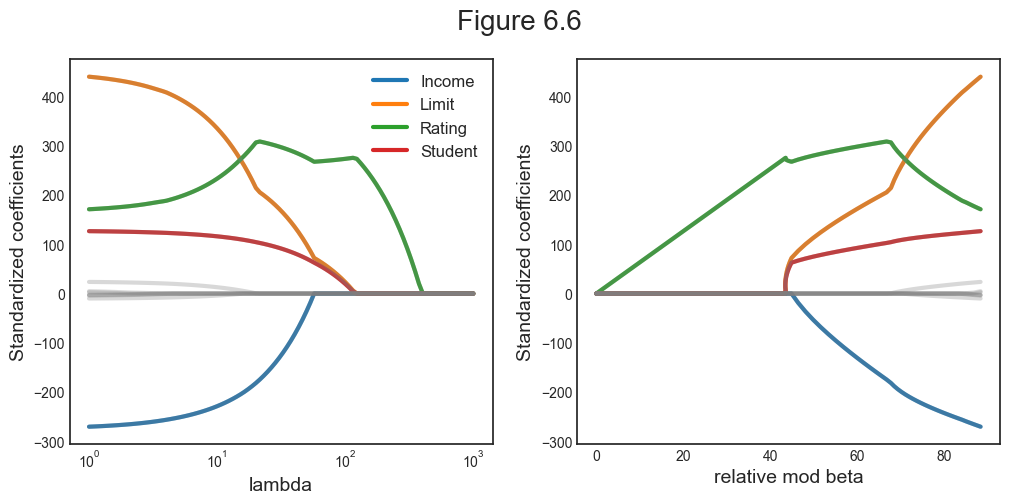

In [47]:
make_figure_6_6()

`Rating`parece ser a variável mais importante, seguida por `Limit` e `Student`.

Tal como na regressão de crista, o laço reduz as estimativas dos coeficientes para zero. No entanto, no caso do laço, $l_{1}$ a penalidade tem o efeito de forçar algumas das estimativas de coeficientes a serem exatamente iguais a zero quando o parâmetro de ajuste $\lambda$ é suficientemente grande. Portanto, assim como a seleção do melhor subconjunto, o laço realiza a seleção de variáveis.

Dizemos que o laço produz modelos ***esparsos*** — isto é, modelos que envolvem apenas um subconjunto da variável

Agora traçamos como a escolha de $\lambda$ afeta o trade-off de viés-variância.

In [48]:
# Init alpha grid
sim = 1000
n_grid = 30
df = pd.DataFrame({'alpha':10**np.linspace(-1,1,n_grid)})
lasso_coefs2 = []

# Init simulations
sim = 1000
lasso = lambda a: Lasso(alpha=a, fit_intercept=False)

# Loop over values of alpha
for i in range(len(df)):
    print("Alpha %1.0f/%1.0f" % (i+1,len(df)), end ="")
    a = df.loc[i,'alpha']
    df.loc[i,['mse','var','bias2']], c = compute_var_bias(X_train, b0, x0, a, k, n, sim, lasso)
    lasso_coefs2.append(c)
    print("", end="\r")
lasso_coefs2 = np.reshape(lasso_coefs2,(n_grid,-1))

In [49]:
# Relative magnitude
mod_ols = np.linalg.norm(ols_coefs)
rel_beta = [np.linalg.norm(lasso_coefs2[k,:])/mod_ols for k in range(n_grid)]
rel_beta = np.reshape(rel_beta, (-1,1))

In [50]:
# OLS regression
y_train = X_train @ b0 + e_train
ols = LinearRegression().fit(X_train,y_train)
ols_coefs = ols.coef_;
mod_ols = np.linalg.norm(ols_coefs)

# Relative magnitude
mod_ols = np.linalg.norm(ols_coefs)
rel_beta = [np.linalg.norm(lasso_coefs2[k,:])/mod_ols for k in range(n_grid)]
rel_beta = np.reshape(rel_beta, (-1,1))

In [51]:
# Figure 6.8
def make_figure_6_8():

    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
    fig.suptitle('Figure 6.8: Lasso Bias-Var decomposition')

    # MSE
    ax1.plot(df['alpha'], df[['bias2','var','mse']]);
    ax1.set_xscale('log');
    ax1.set_xlabel('lambda'); ax1.set_ylabel('Mean Squared Error');
    ax1.legend(['Bias2','Variance','MSE'], fontsize=12);

    # MSE
    ax2.plot(rel_beta, df[['bias2','var','mse']]);
    ax2.set_xlabel('Relative Beta'); ax1.set_ylabel('Mean Squared Error');
    ax2.legend(['Bias2','Variance','MSE'], fontsize=12);

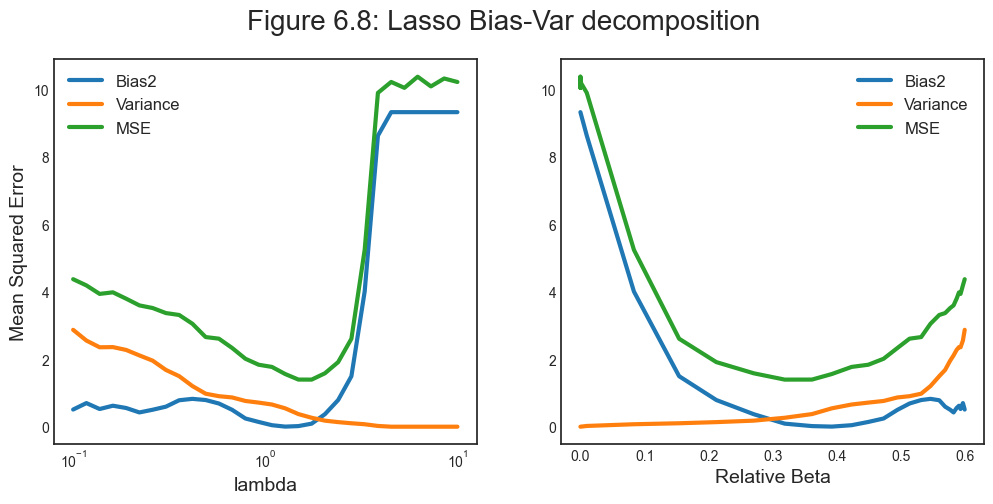

In [52]:
make_figure_6_8()

Como $\lambda$ aumenta o viés quadrado aumenta e a variância diminui.

### 5.5. Comparando a regressão Lasso e Ridge

Para obter uma melhor intuição sobre o comportamento da regressão de crista e do laço, considere um caso especial simples com $n=p$, e $X$ uma matriz diagonal com $1$ na diagonal e $0$ em todos os elementos fora da diagonal. Para simplificar ainda mais o problema, considere também que estamos realizando uma regressão sem interceptação.

Com essas suposições, o problema usual dos mínimos quadrados simplifica-se para os coeficientes que minimizam

$$ \sum_{j=1}^{p} (y_{j}-\beta_{j})^{2} $$

Neste caso, a solução dos mínimos quadrados é dada por

$$ \hat{\beta}_{j}=y_{j} $$

Pode-se mostrar que, neste cenário, as estimativas de regressão de crista assumem a forma

$$ \hat{\beta}_{j}^{Ridge}=\left(\frac{y_{j}}{1+\lambda}\right) $$
 

e as estimativas do laço assumem a forma

$$
\hat{\beta}_{j}^{LASSO} = 
\begin{cases}
y_{j} - \lambda/2 & \text{se } y_{j} > \lambda/2 \\
y_{j} + \lambda/2 & \text{se } y_{j} < -\lambda/2 \\
0 & \text{se } |y_{j}| \leq \lambda/2
\end{cases}
$$


Nós traçamos o relacionamento visualmente.

In [53]:
np.random.seed(3)

# Generate random data
n = 100
k = n
X = np.eye(k)
e = normal(0,1,(n,1))
b0 = uniform(-1,1,(k,1))
y = X @ b0 + e

In [54]:
# OLS regression
reg = LinearRegression().fit(X,y)
ols_coefs = reg.coef_;

# Ridge regression
ridge = Ridge(alpha=1).fit(X,y)
ridge_coefs = ridge.coef_;

# Ridge regression
lasso = Lasso(alpha=0.01).fit(X,y)
lasso_coefs = lasso.coef_.reshape(1,-1);

# sort
order = np.argsort(y.reshape(1,-1), axis=1)
y_sorted = np.take_along_axis(ols_coefs, order, axis=1) 
ols_coefs = np.take_along_axis(ols_coefs, order, axis=1) 
ridge_coefs = np.take_along_axis(ridge_coefs, order, axis=1) 
lasso_coefs = np.take_along_axis(lasso_coefs, order, axis=1) 

In [55]:
# Figure 6.10
def make_figure_6_10():
    
    # Init
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.suptitle('Figure 6.10')

    # Ridge
    ax1.plot(y_sorted.T, ols_coefs.T)
    ax1.plot(y_sorted.T, ridge_coefs.T)
    ax1.set_xlabel('True Coefficient'); ax1.set_ylabel('Estimated Coefficient');
    ax1.legend(['OLS','Ridge'], fontsize=12);

    # Lasso
    ax2.plot(y_sorted.T, ols_coefs.T)
    ax2.plot(y_sorted.T, lasso_coefs.T)
    ax2.set_xlabel('True Coefficient'); ax2.set_ylabel('Estimated Coefficient');
    ax2.legend(['OLS','Lasso'], fontsize=12);

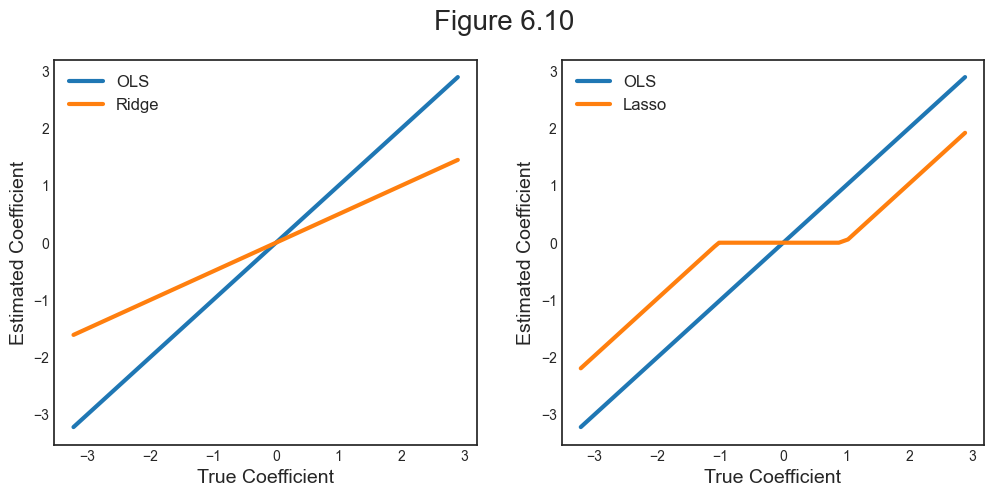

In [56]:
make_figure_6_10()

Vemos que a regressão de crista reduz todas as dimensões dos dados na mesma proporção, enquanto o laço reduz todos os coeficientes em direção a zero em uma quantidade similar, e coeficientes suficientemente pequenos são reduzidos até zero.

### 5.6. Selecionando o parâmetro de ajuste

A implementação da regressão de crista e do Lasso requer um método para selecionar um valor para o parâmetro de ajuste $\lambda$.

A validação cruzada oferece uma maneira simples de resolver esse problema. Escolhemos uma grade de $\lambda$
valores e calcular o erro de validação cruzada para cada valor de $\lambda$. Em seguida, selecionamos o valor do parâmetro de ajuste para o qual o erro de validação cruzada é o menor. Por fim, o modelo é reajustado usando todas as observações disponíveis e o valor selecionado do parâmetro de ajuste.

In [57]:
# X and y
categ_cols = ["Gender", "Student", "Married", "Ethnicity"]
X = credit.loc[:, credit.columns != 'Balance']
X = pd.get_dummies(X, columns=categ_cols, drop_first=True).values
y = credit.loc[:,'Balance']
n = len(credit)

Usaremos o CV de 10 vezes como algoritmo de validação cruzada.

In [64]:
def cv_lasso(X, y, a):
    # Init mse
    mse = []
    
    # Generate splits
    kf10 = KFold(n_splits=10, random_state=None, shuffle=False)
    
    # Loop over splits
    for train_index, test_index in kf10.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        lasso = Lasso(alpha=a, max_iter=10000).fit(X_train, y_train)
        y_hat = lasso.predict(X_test)
        mse.append(mean_squared_error(y_test, y_hat))
    
    return np.mean(mse)

In [65]:
# Compute MSE over grid of alphas
n_grid = 30
alphas = 10 ** np.linspace(0, 3, n_grid)  # CORRETO: shape (30,)

MSE = [cv_lasso(scale(X), y.values, a) for a in alphas]

Qual é o $\lambda$ ideal?

In [67]:
# Find minimum alpha
alpha_min = alphas[np.argmin(MSE)]
print('Best alpha by 10fold CV:',alpha_min)

Best alpha by 10fold CV: 1.0


Agora plotamos a função objetivo e os coeficientes implícitos $\lambda$ no ponto ótimo.

In [68]:
# Get coefficients
coefs = []

# Loop over values of alpha
for a in alphas:
    lasso = Lasso(alpha=a).fit(scale(X), y)
    coefs.append(lasso.coef_)
coefs = np.reshape(coefs,(n_grid,-1))

In [69]:
# Figure 6.12
def make_figure_6_12():
    
    # Init
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.suptitle('Figure 6.12: Lasso 10-fold CV')

    # MSE by LOO CV
    ax1.plot(alphas, MSE, alpha=1);
    ax1.axvline(alpha_min, c='k', ls='--')
    ax1.set_xscale('log')
    ax1.set_xlabel('lambda'); ax1.set_ylabel('MSE');

    highlight = [0,1,2,7];

    # Plot coefficients - absolute
    ax2.plot(alphas, coefs[:,highlight], alpha=1)
    ax2.plot(alphas, coefs, c='grey', alpha=0.3)
    ax2.axvline(alpha_min, c='k', ls='--')
    ax2.set_xscale('log')
    ax2.set_xlabel('lambda'); ax2.set_ylabel('Standardized coefficients');
    ax2.legend(['Income', 'Limit', 'Rating', 'Student'], fontsize=10);

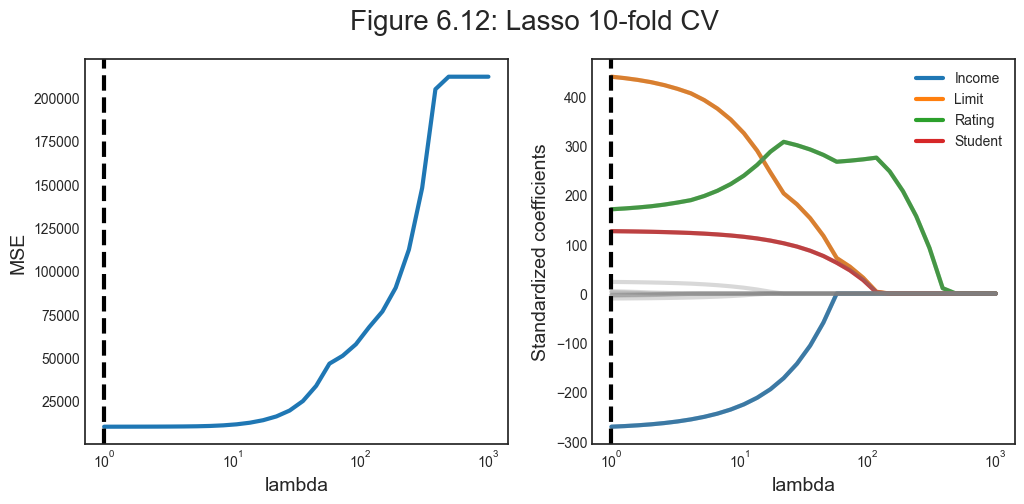

In [70]:
make_figure_6_12()